In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

#вывод текста
from IPython.core.display import display, HTML
from IPython.display import Math

-----------PART1----------------

In [2]:
u = pow(10, 6) #исходное число делящихся ядер
n = 1 #исходное число свободных нейтронов
nu = 2 #количество нейтронов, которые испускаются в результате реакции деления
iterations = 0
n_iter = []
u_iter = []

In [3]:
while u > 0:
    '''одна итерация цикла = поколение нейтронов'''
    iterations += 1
    n_iter.append(n)
    u_iter.append(u)
    for _ in range(n):
        '''одна итерация цикла = судьба одного нейтрона данного поколения'''
        u -= 1
        n -= 1 if n > 0 else 0 #нейтрон, поделивший ядкро, исчезает из общего количества
        n += nu #в результате деления к общему количеству нейтронов + nu

    if u <= 0:
        iterations += 1
        n_iter.append(n)
        u_iter.append(0)
        print('Количество поколений нейтронов, за которые закончились ядра урана', iterations)

Количество поколений нейтронов, за которые закончились ядра урана 21


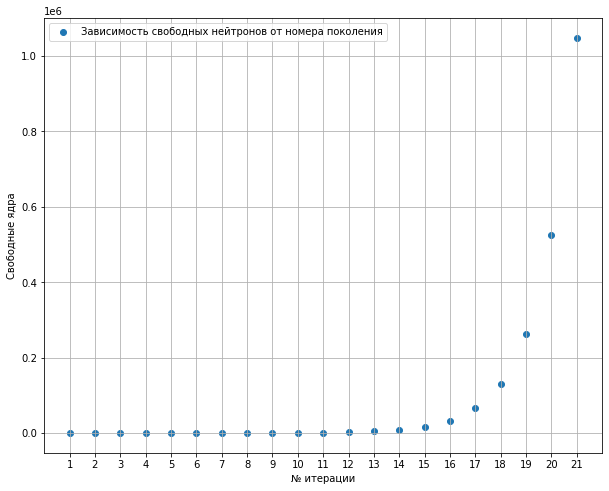

In [4]:
#Отрисовка графика зависимости текущего количества свободных нейтронов от номера поколения
plt.scatter(range(1, iterations+1), n_iter, alpha=1,
        label='Зависимость свободных нейтронов от номера поколения')
plt.grid()
plt.xlabel('№ итерации')
plt.xticks(np.arange(1, iterations+1, 1.0))
plt.ylabel('Свободные ядра')
plt.legend(loc='best')
plt.show()

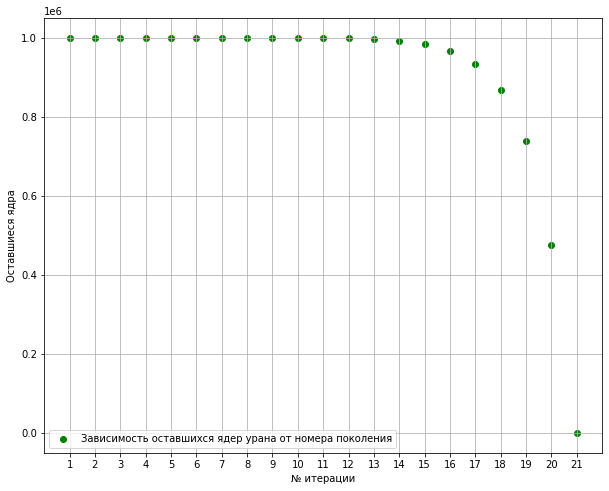

In [5]:
#Отрисовка графика зависимости количества оставшихся ядер урана от номера поколения
plt.scatter(range(1, iterations+1), u_iter, alpha=1, c='green',
            label='Зависимость оставшихся ядер урана от номера поколения')
plt.grid()
plt.xlabel('№ итерации')
plt.xticks(np.arange(1, iterations+1, 1.0))
plt.ylabel('Оставшиеся ядра')
plt.legend(loc='best')
plt.show()

ОТЧЕТ

1)По формуле 

$$log_2{U}+1$$

Да, связаны. Количество нейтронов похоже на экспоненциальный рост, количество ядер на экспоненциальное убывание.

$$k = \left(\frac{n_{i+1}}{n_{i}}\right)$$

где i - номер поколения

Увеличить исходное число свободных нейтронов, например при n=10 число поколений становится равным 18, вместо 21 при 1 свободном нейтроне
Нет, это ускорение не влияет на k, так как k завист от nu - количество нейтронов, которые испускаются в результате реакции деления, а не от начального количества свободных нейтронов

$$\left(\frac{dn}{dt}\right) = \left(\frac{n(k-1)}{\tau}\right)$$

$$n(t) = e^\left(\frac{n(k-1)}{\tau}\right)$$

где n(k-1) - изменение количества нейтронов за единицу времени, тау - время нейтронного цикла.

-------------PART2-------------------

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from random import random
import math

ЭКСПЕРИМЕНТ 1
$$P_{f} = 0.2, P_{s} = 0.6, P_{c} = 0.2$$

In [7]:
u = pow(10, 6) #исходное число делящихся ядер
n = 1 #исходное число свободных нейтронов
nu = 2 #количество нейтронов, которые испускаются в результате реакции деления
iterations = 0
n_iter = []
u_iter = []
coeff_k = []
n_last = n

In [8]:
while u > 0:
    '''одна итерация цикла = поколение нейтронов'''
    iterations += 1
    n += 1  # дополнительное внешнее воздействие
    n_iter.append(n)
    u_iter.append(u)
    if iterations > 1:
        coeff_k.append(round(n / n_last, 3))
    n_last = n
    for _ in range(n):
        '''одна итерация цикла = судьба одного нейтрона данного поколения'''
        x = random()
        if x < 0.2:#деление ядра нейтроном
            u -= 1
            n += (nu - 1) if n > 0 else 0
        elif 0.2 <= x <= 0.8:#рассеяние нейтрона с ядром
            continue
        else:#захват нейтрона ядром
            u -= 1
            n -= 1 if n > 0 else 0

iterations += 1
n_iter.append(n)
u_iter.append(0)
coeff_k.append(round(n_iter[-1] / n_iter[-2], 3))
print('Количество поколений нейтронов, за которые закончились ядра урана', iterations)

Количество поколений нейтронов, за которые закончились ядра урана 2104


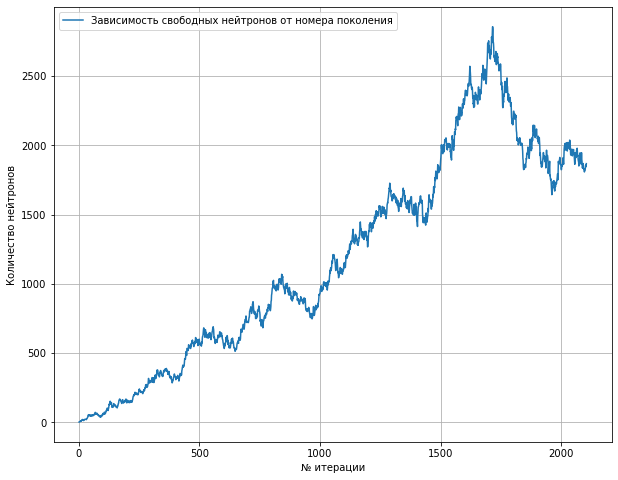

In [9]:
#Отрисовка графика зависимости текущего количества свободных нейтронов от номера поколения
plt.plot(range(1, iterations+1), n_iter, alpha=1,
        label='Зависимость свободных нейтронов от номера поколения')
plt.grid()
plt.xlabel('№ итерации')
#plt.xticks(np.arange(1, iterations+1, 1.0))
plt.ylabel('Количество нейтронов')
plt.legend(loc='best')
plt.show()

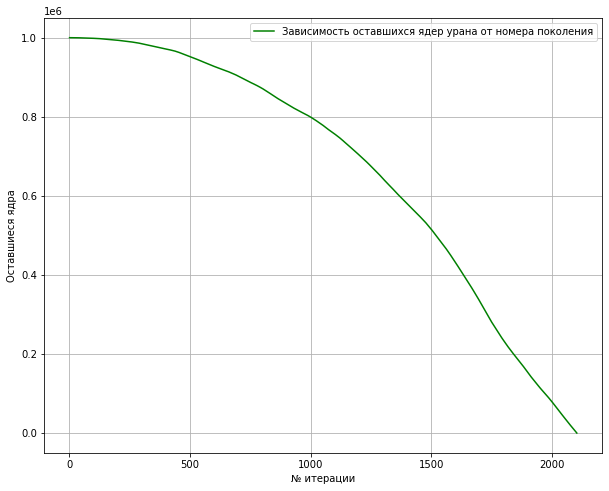

In [10]:
#Отрисовка графика зависимости количества оставшихся ядер урана от номера поколения
plt.plot(range(1, iterations+1), u_iter, alpha=1, c='green',
            label='Зависимость оставшихся ядер урана от номера поколения')
plt.grid()
plt.xlabel('№ итерации')
#plt.xticks(np.arange(1, iterations+1, 1.0))
plt.ylabel('Оставшиеся ядра')
plt.legend(loc='best')
plt.show()

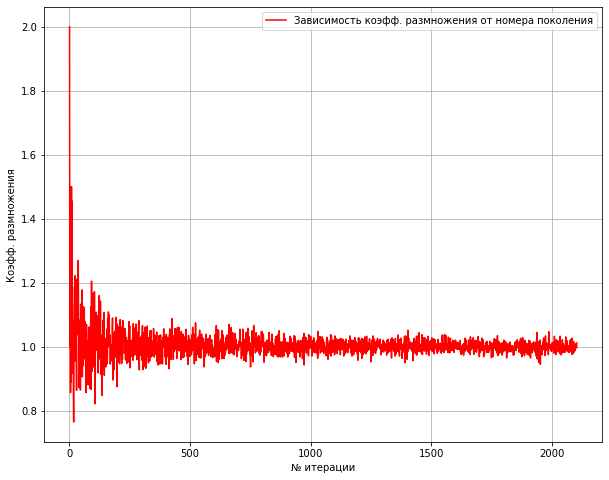

In [11]:
#Отрисовка графика коэффициента размножения k от номера поколения
plt.plot(range(1, iterations), coeff_k, alpha=1, c='red',
            label='Зависимость коэфф. размножения от номера поколения')
plt.grid()
plt.xlabel('№ итерации')
#plt.xticks(np.arange(1, iterations+1, 1.0))
plt.ylabel('Коэфф. размножения')
plt.legend(loc='best')
plt.show()

In [12]:
#Среднее значение коэффициента размножения k по всем поколениям
average_coeff_k = sum(coeff_k) / len(coeff_k)
print('Среднее значение коэффициента размножения k по всем поколениям %.3f' %(average_coeff_k))

Среднее значение коэффициента размножения k по всем поколениям 1.004


In [13]:
#"Предельное" значение k, если наблюдается сходимость к одному значению
count = 0
for i in range(1,6):
    if coeff_k[-1] - 0.2 <= coeff_k[-i] <=coeff_k[-1] + 0.2:
        count += 1
        if count == 5:
            ans = coeff_k[-1]
ans

1.012

ЭКСПЕРИМЕНТ 2
$$P_{f} = 0.1, P_{s} = 0.3, P_{c} = 0.6$$

In [14]:
u = pow(10, 6) #исходное число делящихся ядер
n = 1 #исходное число свободных нейтронов
nu = 2 #количество нейтронов, которые испускаются в результате реакции деления
iterations = 0
n_iter = []
u_iter = []
coeff_k = []
n_last = n

In [15]:
while u > 0:
    '''одна итерация цикла = поколение нейтронов'''
    iterations += 1
    n += 1  # дополнительное внешнее воздействие
    n_iter.append(n)
    u_iter.append(u)
    if iterations > 1:
        coeff_k.append(round(n / n_last, 3))
    n_last = n
    for _ in range(n):
        '''одна итерация цикла = судьба одного нейтрона данного поколения'''
        x = random()
        if x < 0.1:#деление ядра нейтроном
            u -= 1
            n += (nu - 1) if n > 0 else 0
        elif 0.1 <= x <= 0.3:#рассеяние нейтрона с ядром
            continue
        else:#захват нейтрона ядром
            u -= 1
            n -= 1 if n > 0 else 0

iterations += 1
n_iter.append(n)
u_iter.append(0)
coeff_k.append(round(n_iter[-1] / n_iter[-2], 3))
print('Количество поколений нейтронов, за которые закончились ядра урана', iterations)

Количество поколений нейтронов, за которые закончились ядра урана 750088


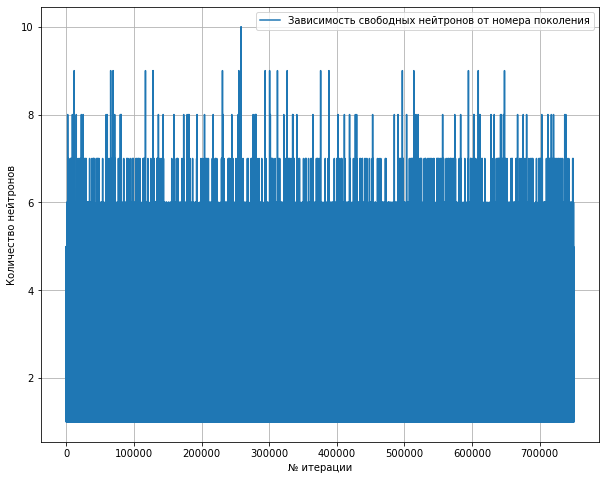

In [16]:
#Отрисовка графика зависимости текущего количества свободных нейтронов от номера поколения
plt.plot(range(1, iterations+1), n_iter, alpha=1,
        label='Зависимость свободных нейтронов от номера поколения')
plt.grid()
plt.xlabel('№ итерации')
#plt.xticks(np.arange(1, iterations+1, 1.0))
plt.ylabel('Количество нейтронов')
plt.legend(loc='best')
plt.show()

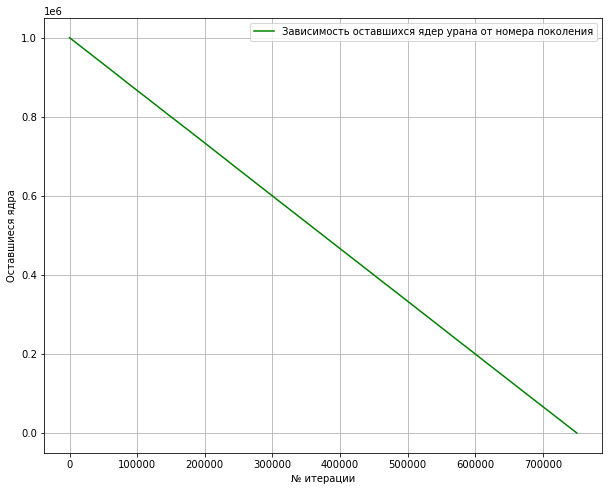

In [17]:
#Отрисовка графика зависимости количества оставшихся ядер урана от номера поколения
plt.plot(range(1, iterations+1), u_iter, alpha=1, c='green',
            label='Зависимость оставшихся ядер урана от номера поколения')
plt.grid()
plt.xlabel('№ итерации')
#plt.xticks(np.arange(1, iterations+1, 1.0))
plt.ylabel('Оставшиеся ядра')
plt.legend(loc='best')
plt.show()

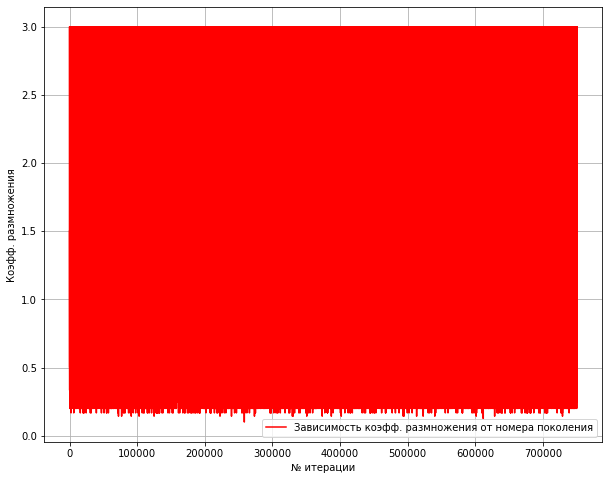

In [18]:
#Отрисовка графика коэффициента размножения k от номера поколения
plt.plot(range(1, iterations), coeff_k, alpha=1, c='red',
            label='Зависимость коэфф. размножения от номера поколения')
plt.grid()
plt.xlabel('№ итерации')
#plt.xticks(np.arange(1, iterations+1, 1.0))
plt.ylabel('Коэфф. размножения')
plt.legend(loc='best')
plt.show()

In [32]:
#Среднее значение коэффициента размножения k по всем поколениям
average_coeff_k = sum(coeff_k) / len(coeff_k)
print('Среднее значение коэффициента размножения k по всем поколениям %.3f' %(average_coeff_k))

Среднее значение коэффициента размножения k по всем поколениям 1.549


In [33]:
#"Предельное" значение k, если наблюдается сходимость к одному значению
count = 0
for i in range(1,6):
    if coeff_k[-1] - 0.2 <= coeff_k[-i] <=coeff_k[-1] + 0.2:
        count += 1
        if count == 5:
            ans = coeff_k[-1]
ans

1.5

ЭКСПЕРИМЕНТ 3
$$P_{f} = 0.6, P_{s} = 0.3, P_{c} = 0.1$$

In [21]:
u = pow(10, 6) #исходное число делящихся ядер
n = 1 #исходное число свободных нейтронов
nu = 2 #количество нейтронов, которые испускаются в результате реакции деления
iterations = 0
n_iter = []
u_iter = []
coeff_k = []
n_last = n

In [22]:
while u > 0:
    '''одна итерация цикла = поколение нейтронов'''
    iterations += 1
    n += 1  # дополнительное внешнее воздействие
    n_iter.append(n)
    u_iter.append(u)
    if iterations > 1:
        coeff_k.append(round(n / n_last, 3))
    n_last = n
    for _ in range(n):
        '''одна итерация цикла = судьба одного нейтрона данного поколения'''
        x = random()
        if x < 0.6:#деление ядра нейтроном
            u -= 1
            n += (nu - 1) if n > 0 else 0
        elif 0.6 <= x <= 0.9:#рассеяние нейтрона с ядром
            continue
        else:#захват нейтрона ядром
            u -= 1
            n -= 1 if n > 0 else 0

iterations += 1
n_iter.append(n)
u_iter.append(0)
coeff_k.append(round(n_iter[-1] / n_iter[-2], 3))
print('Количество поколений нейтронов, за которые закончились ядра урана', iterations)

Количество поколений нейтронов, за которые закончились ядра урана 31


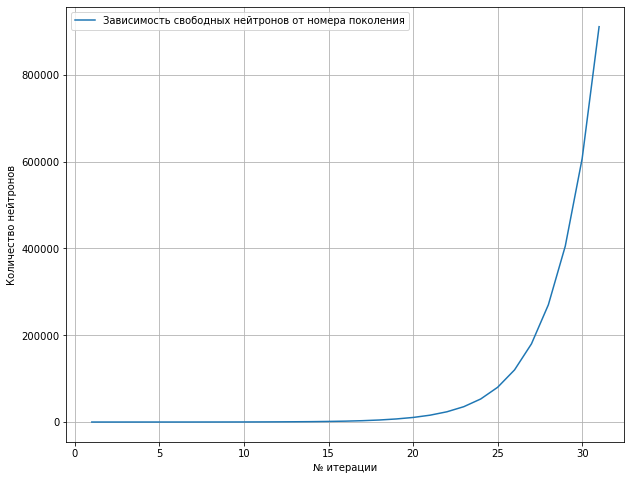

In [23]:
#Отрисовка графика зависимости текущего количества свободных нейтронов от номера поколения
plt.plot(range(1, iterations+1), n_iter, alpha=1,
        label='Зависимость свободных нейтронов от номера поколения')
plt.grid()
plt.xlabel('№ итерации')
#plt.xticks(np.arange(1, iterations+1, 1.0))
plt.ylabel('Количество нейтронов')
plt.legend(loc='best')
plt.show()

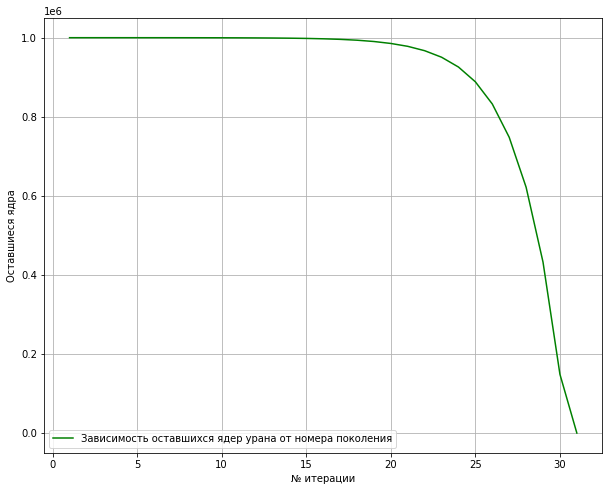

In [24]:
#Отрисовка графика зависимости количества оставшихся ядер урана от номера поколения
plt.plot(range(1, iterations+1), u_iter, alpha=1, c='green',
            label='Зависимость оставшихся ядер урана от номера поколения')
plt.grid()
plt.xlabel('№ итерации')
#plt.xticks(np.arange(1, iterations+1, 1.0))
plt.ylabel('Оставшиеся ядра')
plt.legend(loc='best')
plt.show()

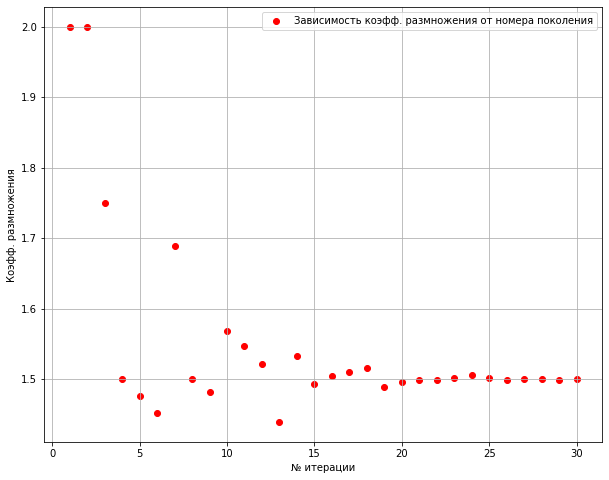

In [25]:
#Отрисовка графика коэффициента размножения k от номера поколения
plt.scatter(range(1, iterations), coeff_k, alpha=1, c='red',
            label='Зависимость коэфф. размножения от номера поколения')
plt.grid()
plt.xlabel('№ итерации')
#plt.xticks(np.arange(1, iterations+1, 1.0))
plt.ylabel('Коэфф. размножения')
plt.legend(loc='best')
plt.show()

In [34]:
#Среднее значение коэффициента размножения k по всем поколениям
average_coeff_k = sum(coeff_k) / len(coeff_k)
print('Среднее значение коэффициента размножения k по всем поколениям %.3f' %(average_coeff_k))

Среднее значение коэффициента размножения k по всем поколениям 1.549


In [35]:
#"Предельное" значение k, если наблюдается сходимость к одному значению
count = 0
for i in range(1,6):
    if coeff_k[-1] - 0.2 <= coeff_k[-i] <=coeff_k[-1] + 0.2:
        count += 1
        if count == 5:
            ans = coeff_k[-1]
ans

1.5

ОТЧЕТ

3)
$$delta_{n_{1}} = P_{f} * n_{0} * nu - P_{f} * n_{0}$$
$$delta_{n_{2}} = 0$$
$$delta_{n_{3}} = P_{c} * n_{0}$$
$$sum_{delta} = P_{f} * n_{0} * nu - P_{f} * n_{0} + P_{c} * n_{0}$$
$$n_{i} = n_{0} * (P_{f} * nu - P_{f} - P_{c})^i + \sum_{k=1}^{i-1} (P_{f} * nu - P_{f} - P_{c})^k + 1$$

4)
$$k = \left(\frac{n_{i+1}}{n_{i}}\right)$$

In [30]:
#5)
#coeff_k_theor
def n_i(n_0, i, P_f, P_c, nu):
    helpa = sum([(P_f * nu - P_f - P_c + 1)**k for k in range(1, i)])
    n_i = n_0 * (P_f * nu - P_f - P_c + 1)**i + helpa + 1
    return n_i

n_i

def coeff_k_theor(n_0, i, P_f, P_c, nu):
    coeff_k = n_i(n_0, i+1, P_f, P_c, nu) / n_i(n_0, i, P_f, P_c, nu)
    return coeff_k

k1 = coeff_k_theor(1, 5, 0.2, 0.2, 2)
k2 = coeff_k_theor(1, 5, 0.1, 0.6, 2)
k3 = coeff_k_theor(1, 5, 0.6, 0.1, 2)

print('1-ый эксперимент. Теоретическое k=%.7f' %(k1))
print('2-ой эксперимент. Теоретическое k=%.7f' %(k2))
print('3-ий эксперимент. Теоретическое k=%.7f' %(k3))

1-ый эксперимент. Теоретическое k=1.1666667
2-ой эксперимент. Теоретическое k=1.0079365
3-ий эксперимент. Теоретическое k=1.5481203


In [29]:
#6)
print('1-ый эксперимент. Теоретическое n=%.2f' %(math.log(u, 1.167)))
print('2-ой эксперимент. Теоретическое n=%.2f' %(math.log(u, 1.008)))
print('3-ий эксперимент. Теоретическое n=%.2f' %(math.log(u, 1.548)))

ValueError: math domain error

Отчет.
1) Характер зависимостей на графиках "Количество ядер урана от номера итерации" и "Количество нейтронов от номера итерации" являются экспоненциальными
Потому что в каждом эксперименте рано или поздно накапливается достаточное количество нейтронов, которое придает данной реакции экспоненциальный характер
2) Имеется очень малое различие между экспериментальными данными и теоретическими в силу того, что реализованная модель является вероятностной